# My Mr Clean


What we are going to do is:

1. Get some article from Wikipedia to work with.
2. Extract meaningful and usable content from this article.
3. Clean up and filter the data to narrow the scope to relevant words
4. Build a simple frequency model.
5. Analysing the article based on this model.

## Importing libraries

In [ ]:
import re
import requests

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt


## Getting the data

We are going to work with an article about the Ozone Layer.


In [ ]:
api = 'https://en.wikipedia.org/w/api.php?explaintext'

In [ ]:
params = {
    'format': 'json',
    'action': 'query',
    'prop': 'extracts',
    'titles': None
}

def get_content(article_name):
    '''
        Sends request and gets article

    Args:
        article_name: name of wikipedia article
        
    Returns:
        response srom wikipedia.org
    '''
    params['titles'] = article_name
    return requests.get(api, params).json()

data = get_content('Ozone layer')
data

{'batchcomplete': '',
 'query': {'pages': {'22834': {'pageid': 22834,
    'ns': 0,
    'title': 'Ozone layer',
    'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually 

## Cleaning and tokenizing

In [ ]:
def merge_contents(data: dict) -> str:
    return data['query']['pages']['22834'][ 'extract']

merge_content = merge_contents(data)
merge_content

'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by the French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that th

In [ ]:
def tokenize(content: list) -> list:
    '''
        Splits text into words.

    Args:
        content: content of article
    
    Returns:
        list of words
    '''
    splitter = [' ', '\. ', ', ',  '-','\n','\.', ':', ';', '\(', '\)']
    return re.split('|'.join(splitter), content)


collection = tokenize(merge_content)
collection[:15]

['The',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 "Earth's",
 'stratosphere',
 'that',
 'absorbs',
 'most']

In [ ]:
def lower_collection(collection: list) -> list:
    '''
        Turns all words into lowercase
    Args:
        collection: list of words
    Returns:
        lowercase list of words
    '''
    for idx, word in enumerate(collection):
        collection[idx] = word.lower()
    return collection

collection = lower_collection(collection)
collection[:15]

['the',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 "earth's",
 'stratosphere',
 'that',
 'absorbs',
 'most']

## Term Frequency

In [ ]:
def count_frequency(collection: list) -> dict:
    '''
        Counts words in a given list
    Args:
        collection: list of words
    Returns:
        words and their count
    '''

    freq = {}
    for word in collection:
        if word.isalpha() and len(word) > 1:
            freq[word] = freq.get(word,1) + 1
    return freq

def print_most_frequent(frequencies: dict, n: int) -> dict:
    '''
        Returns most frequent n words

    Args:
        frequencies: word counts
        n: number of most frequent words
    '''
    top_words = {key:val for key, val in sorted(frequencies.items(),key = lambda x: x[1], reverse = True)[:n]}
    return top_words


frequencies = count_frequency(collection)
# print(frequencies)

freq_words = print_most_frequent(frequencies, 20)
freq_words

{'the': 191,
 'of': 95,
 'ozone': 82,
 'and': 72,
 'in': 63,
 'to': 56,
 'is': 36,
 'layer': 29,
 'by': 23,
 'that': 20,
 'uv': 18,
 'radiation': 17,
 'for': 17,
 'was': 16,
 'from': 15,
 'are': 15,
 'ultraviolet': 14,
 'nm': 14,
 'at': 14,
 'stratosphere': 13}

## Visualizing

[]

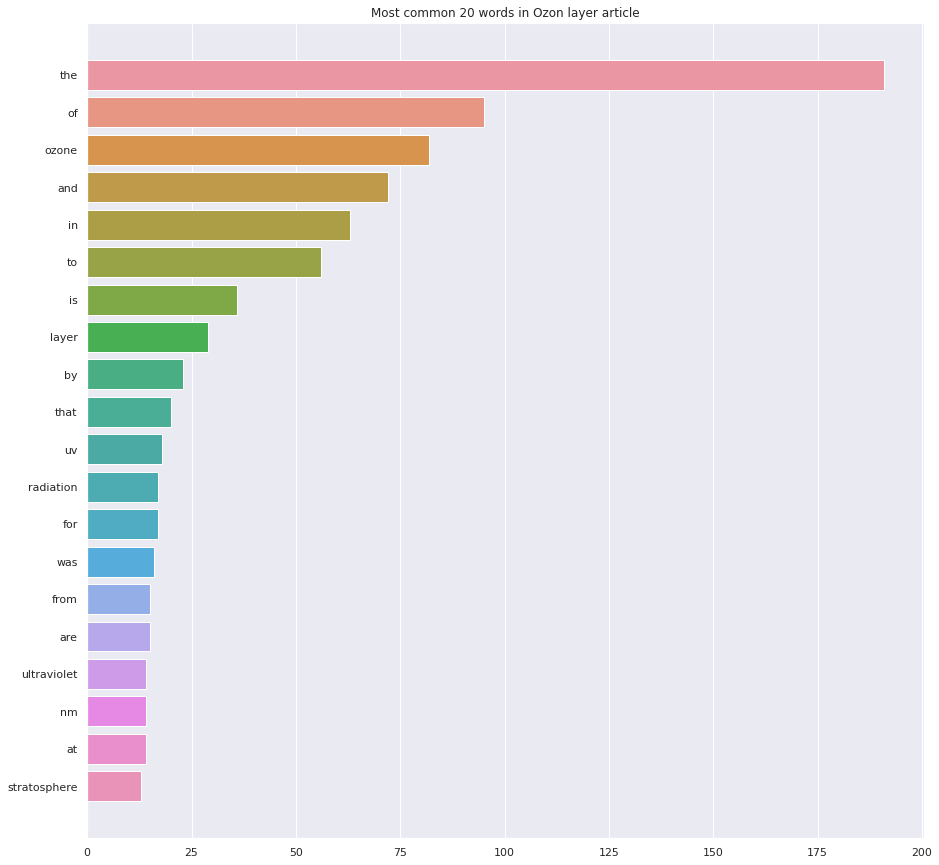

In [ ]:
plt.figure(figsize = (15,15))
sns.barplot(y = list(freq_words.keys()), x = list(freq_words.values()), orientation = 'horizontal')
plt.title('Most common 20 words in Ozon layer article')
plt.plot()

## Filtering

In [ ]:
stop_words = ['of', 'the', 'to', 'and', 'a',
            'in', 'it', 'is', 'that', 'had', 'on', 
            'for', 'were', 'was', 'by', 'from', 
            'are', 'at', 'or', 'as', 'be', 'about', 
            'an', 'no', 'with', 'this', 'have', 'other', 
            'has', 'this', 'which', 'its', 'these', 
            'most', 'into', 'out', 'all', 'can']


def remove_stop_words(words: list, stop_words: list)->list:
    '''
        Removes stop words
    Args:
        words: list of words
        stop_words: words that need to b removed from list
    Returns:
        filtered list of words
    '''

    words = ' '.join(words)
    for stop_word in stop_words:
        words = re.sub(fr'\b{stop_word}\b', '', words)
    return words.split()

filtered_collection = remove_stop_words(collection, stop_words)
filtered_collection[:15]


['ozone',
 'layer',
 'ozone',
 'shield',
 'region',
 "earth's",
 'stratosphere',
 'absorbs',
 "sun's",
 'ultraviolet',
 'radiation',
 'contains',
 'high',
 'concentration',
 'ozone']

[]

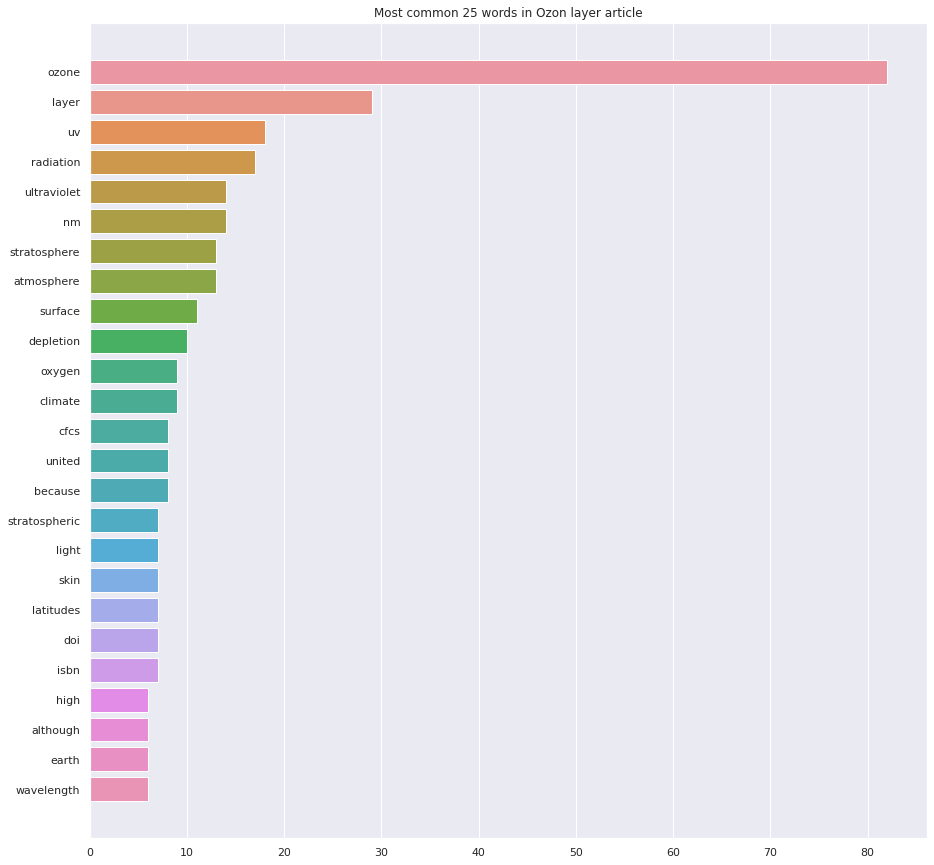

In [ ]:
frequencies = count_frequency(filtered_collection)

freq_words = print_most_frequent(frequencies, 25)

plt.figure(figsize = (15,15))
sns.barplot(y = list(freq_words.keys()), x = list(freq_words.values()), orientation = 'horizontal')
plt.title('Most common 25 words in Ozon layer article')
plt.plot()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f766aa9-9cee-41a6-b97f-32c3f95ed653' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>